In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

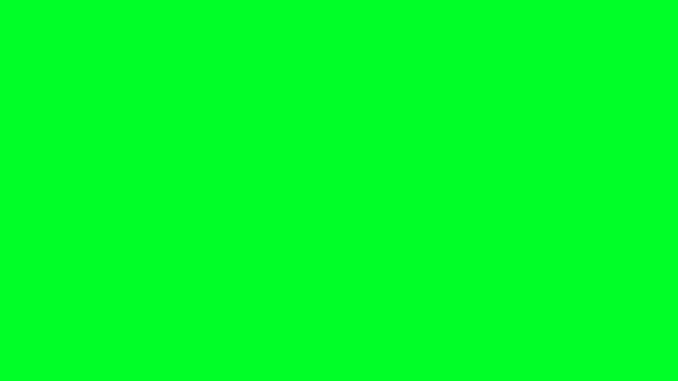

In [4]:
bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))
cv2_imshow(bg1_image)

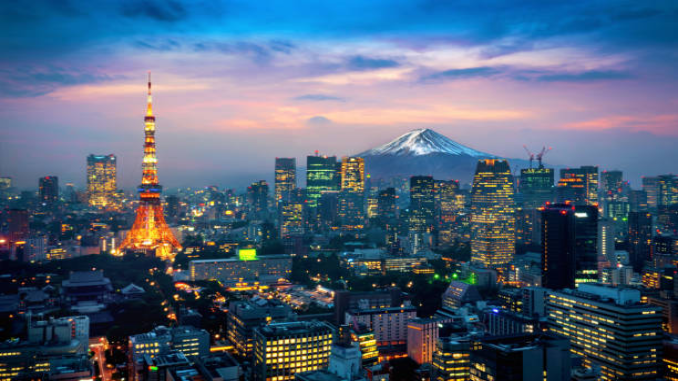

In [5]:
bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))
cv2_imshow(bg2_image)

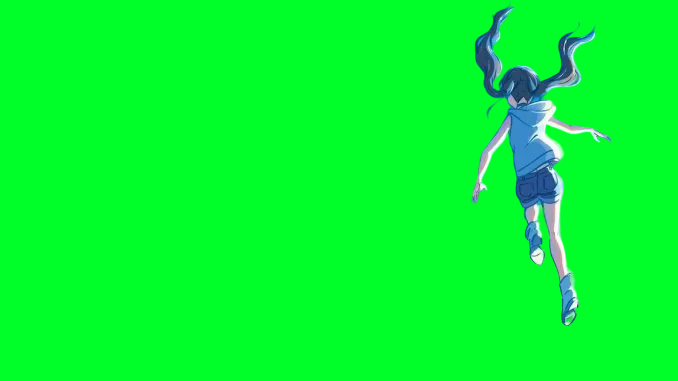

In [6]:
ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))
cv2_imshow(ob_image)

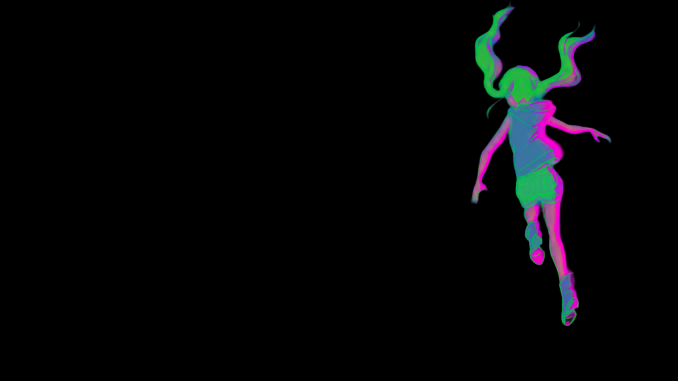

In [7]:
def compute_difference(bg_img, input_img):
  return cv2.absdiff(bg_img, input_img)

difference_single_channel = compute_difference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

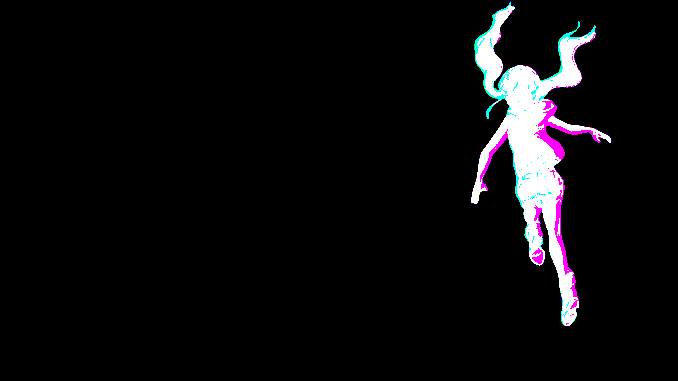

In [9]:
def compute_binary_mask(difference_single_channel):
  _, binary_mask = cv2.threshold(difference_single_channel, 15, 255, cv2.THRESH_BINARY)
  return binary_mask

binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

In [10]:
def replace_background(bg1_image, bg2_image, ob_image):
  difference_single_channel = compute_difference(bg1_image, ob_image)

  binary_mask = compute_binary_mask(difference_single_channel)

  output = np.where(binary_mask==255, ob_image, bg2_image)

  return output

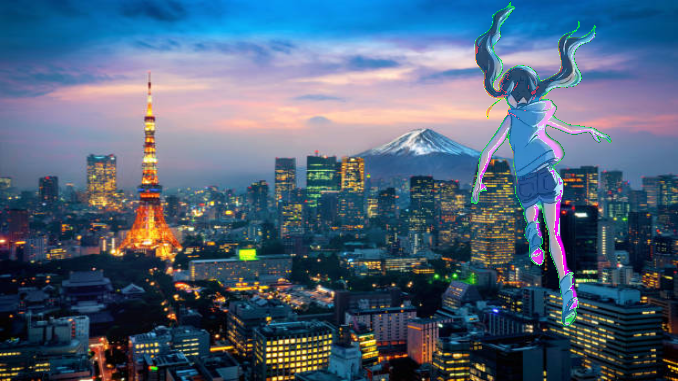

In [11]:
result_image = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(result_image)